/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 0.975
Confusion Matrix : 
 [[24  1]
 [ 0 15]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



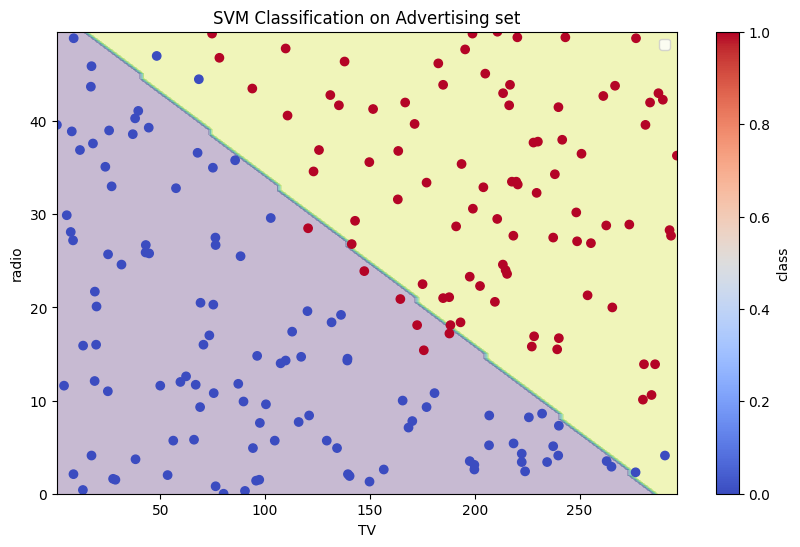

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/Advertising.csv')
df.head()

y = (df['sales']>df['sales'].mean()).astype(int)
x = df[['TV','radio']]

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score}")
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

plt.figure(figsize = (10,6))
x1_range = np.linspace( x['TV'].min(),x['TV'].max(),100)
x2_range = np.linspace( x['radio'].min(), x['radio'].max(),100)

x1_grid , x2_grid = np.meshgrid(x1_range,x2_range)

x_grid = np.c_[x1_grid.ravel(),x2_grid.ravel()]
x_grid_scaled = scaler.transform(x_grid)

y_grid_pred = svm_model.predict(x_grid_scaled)
y_grid_pred = y_grid_pred.reshape(x1_grid.shape)

plt.contourf(x1_grid,x2_grid,y_grid_pred,alpha=0.3)
plt.scatter(x['TV'],x['radio'],c=y,cmap='coolwarm')
plt.xlabel('TV')
plt.ylabel('radio')
plt.title('SVM Classification on Advertising set')
plt.colorbar(label='class')
plt.legend()
plt.show()


In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score  # Added accuracy_score

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Split the data into features and target
X = df.drop(columns='target')
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display actual vs predicted results
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head())


Accuracy: 1.00
Mean Squared Error: 0.0
   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1
